In [ ]:
# Apple Stock Price Prediction
# The objective of stock price prediction is to forecast future stock prices using historical data and 
# market trends to help investors make informed decisions, maximize returns, and manage risk.
# Accurate predictions enable better buy/sell strategies and improve portfolio management.

In [481]:
import pandas as pd 
import numpy as np
import matplotlib as plt

In [483]:
data = pd.read_csv("Apple Dataset.csv")

In [485]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600
...,...,...,...,...,...,...,...
10949,2024-05-20,189.330002,191.919998,189.009995,191.039993,191.039993,44361300
10950,2024-05-21,191.089996,192.729996,190.919998,192.350006,192.350006,42309400
10951,2024-05-22,192.270004,192.820007,190.270004,190.899994,190.899994,34648500
10952,2024-05-23,190.979996,191.000000,186.630005,186.880005,186.880005,51005900


In [487]:
#data preprossing

In [489]:
if 'Date' in data.columns:
   data.set_index("Date",inplace =True)

In [491]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600
...,...,...,...,...,...,...
2024-05-20,189.330002,191.919998,189.009995,191.039993,191.039993,44361300
2024-05-21,191.089996,192.729996,190.919998,192.350006,192.350006,42309400
2024-05-22,192.270004,192.820007,190.270004,190.899994,190.899994,34648500


In [493]:
#check missing value
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [495]:
# visulization of present stock price data 
import matplotlib.pyplot as plt
%matplotlib inline

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

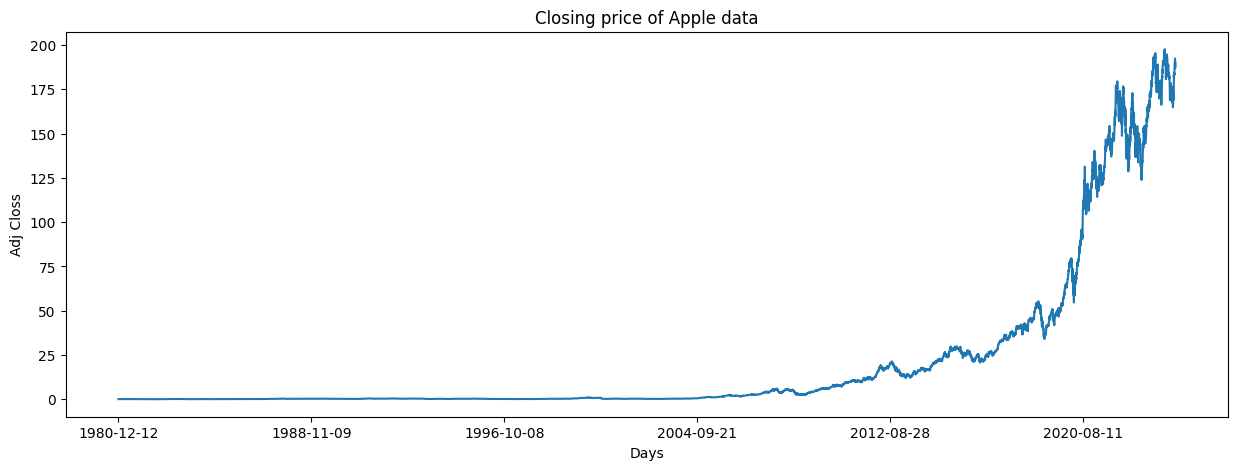

In [497]:
plt.figure(figsize = (15,5))
data['Adj Close'].plot()
plt.xlabel("Days")
plt.ylabel('Adj Closs')
plt.title("Closing price of Apple data")


data.columns

In [499]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Apple data")
    

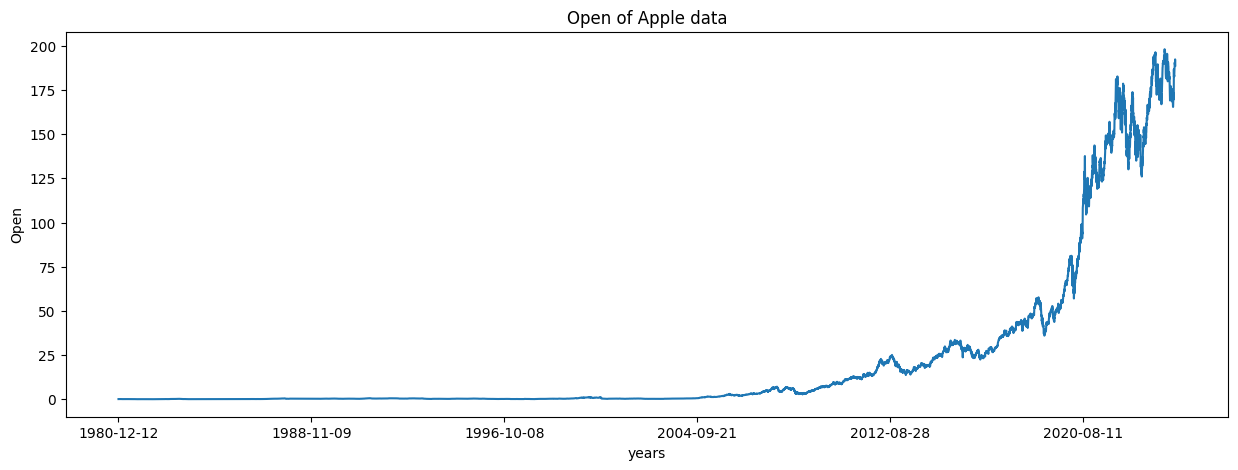

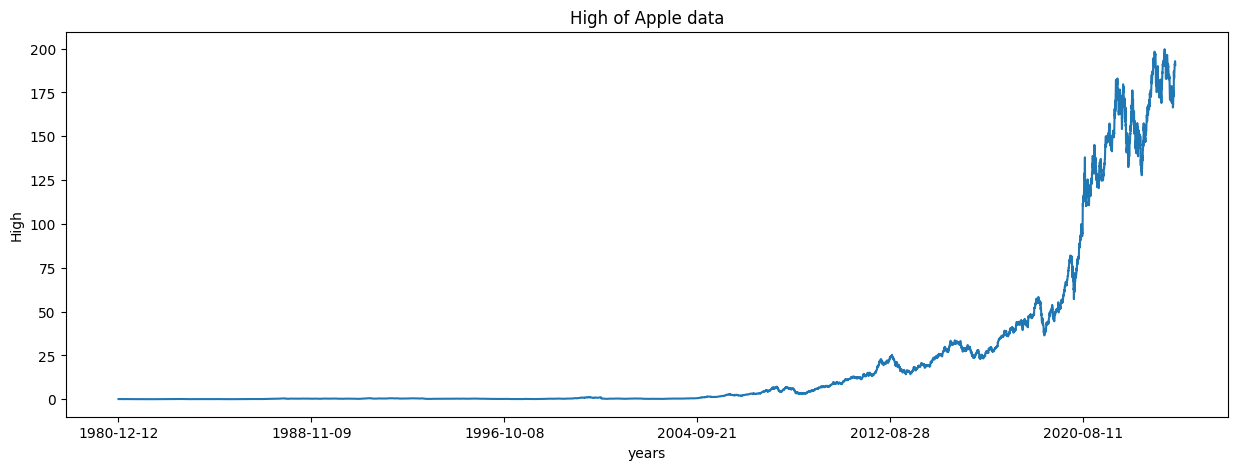

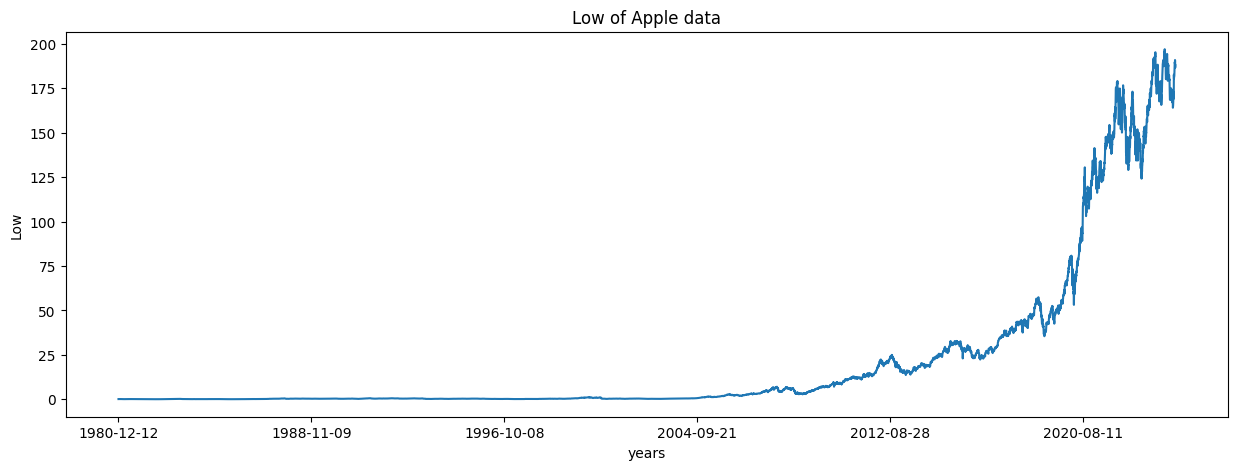

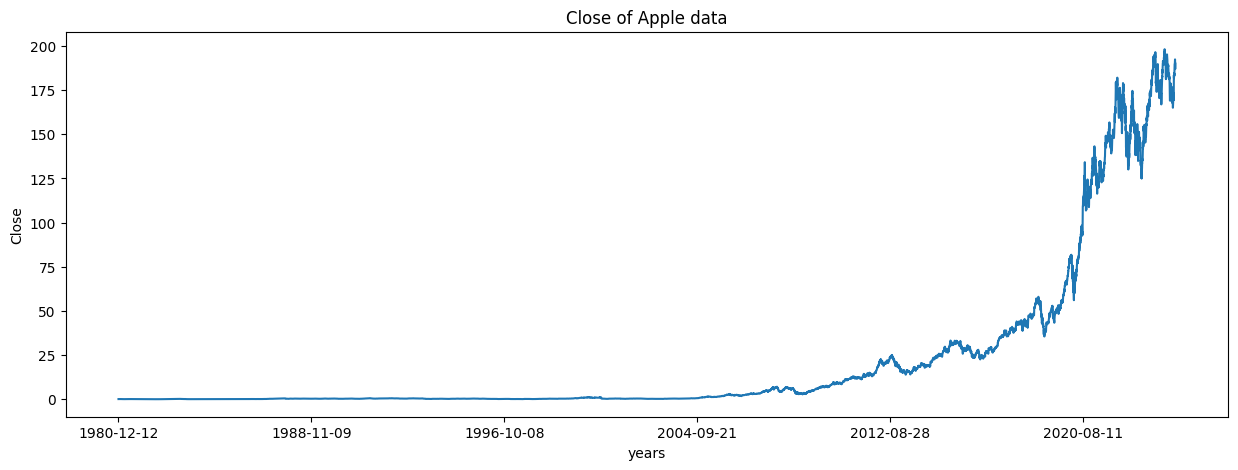

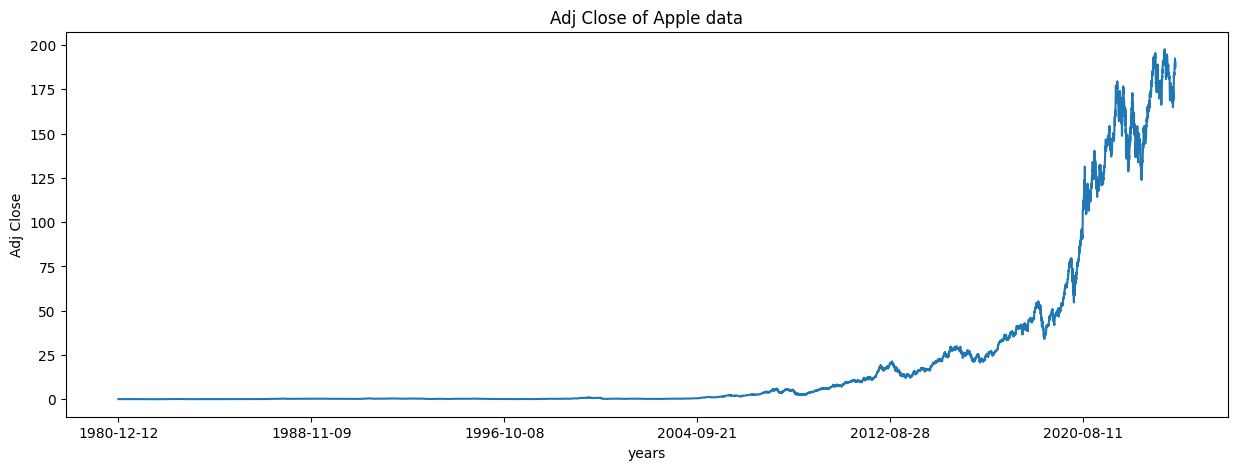

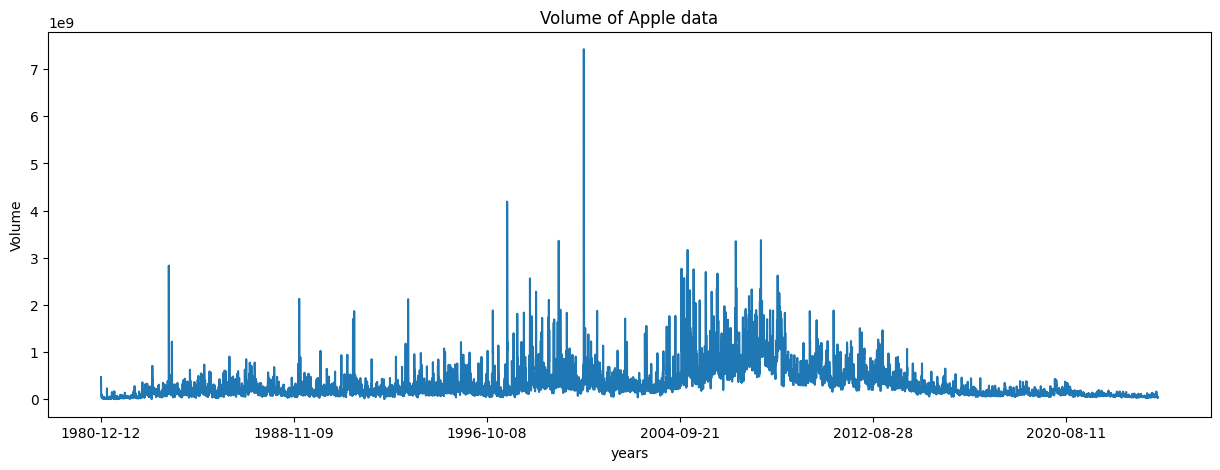

In [501]:
for column in data.columns:
    plot_graph((15,5),data[column], column) 

In [503]:
# collect the informative information

In [505]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [507]:
data_temp = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data_temp.head()

,0
0,10
1,20
2,30
3,40
4,50


In [509]:
data_temp['MA'] = data_temp.rolling(5).mean()
data_temp

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [511]:
# trane the stock price model

In [513]:
data.index = pd.to_datetime(data.index)

# Count occurrences of each year
year_counts = data.index.year.value_counts().sort_index()

# Loop through the range of years and print the counts, defaulting to 0 if the year is missing
for i in range(1981, 2026):
    print(i, year_counts.get(i, 0))  # Get the count or return 0 if year is not present


1981 253
1982 253
1983 253
1984 253
1985 252
1986 253
1987 253
1988 253
1989 252
1990 253
1991 253
1992 254
1993 253
1994 252
1995 252
1996 254
1997 253
1998 252
1999 252
2000 252
2001 248
2002 252
2003 252
2004 252
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 101
2025 0


In [515]:
data['MA_for_250_days'] = data['Adj Close'].rolling(250).mean()

In [517]:
data['MA_for_250_days'][0:250].tail()

Date
1981-12-02         NaN
1981-12-03         NaN
1981-12-04         NaN
1981-12-07         NaN
1981-12-08    0.085676
Name: MA_for_250_days, dtype: float64

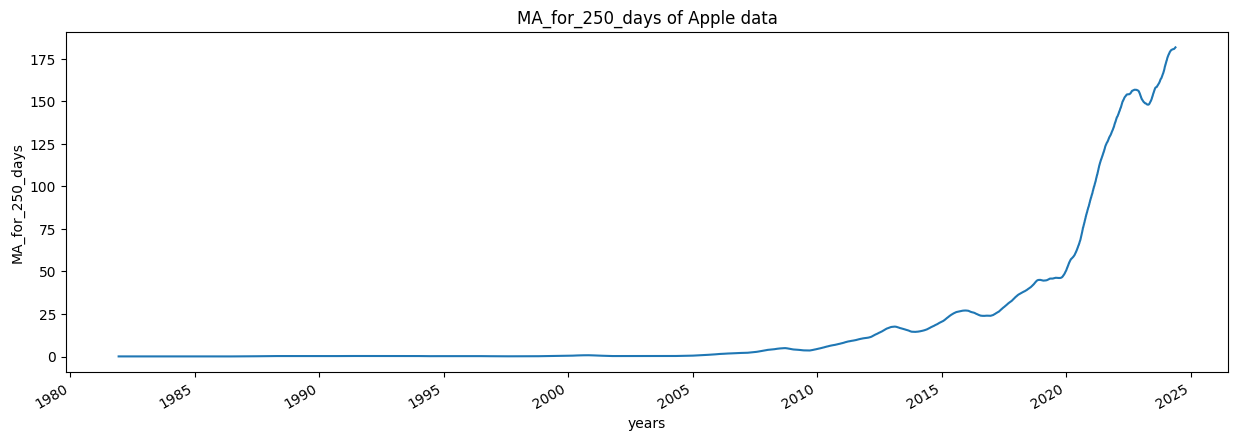

In [520]:
plot_graph((15,5), data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

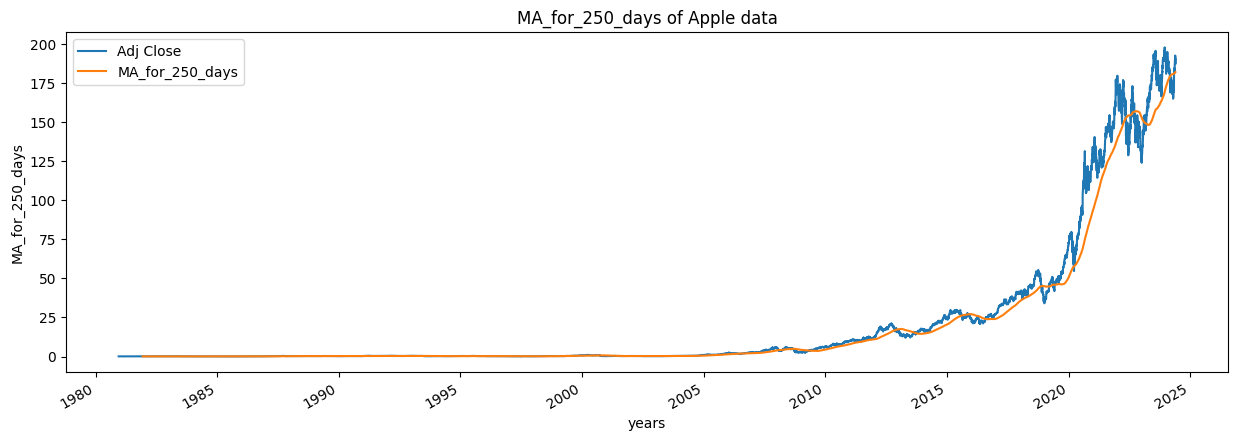

In [522]:
plot_graph((15,5), data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

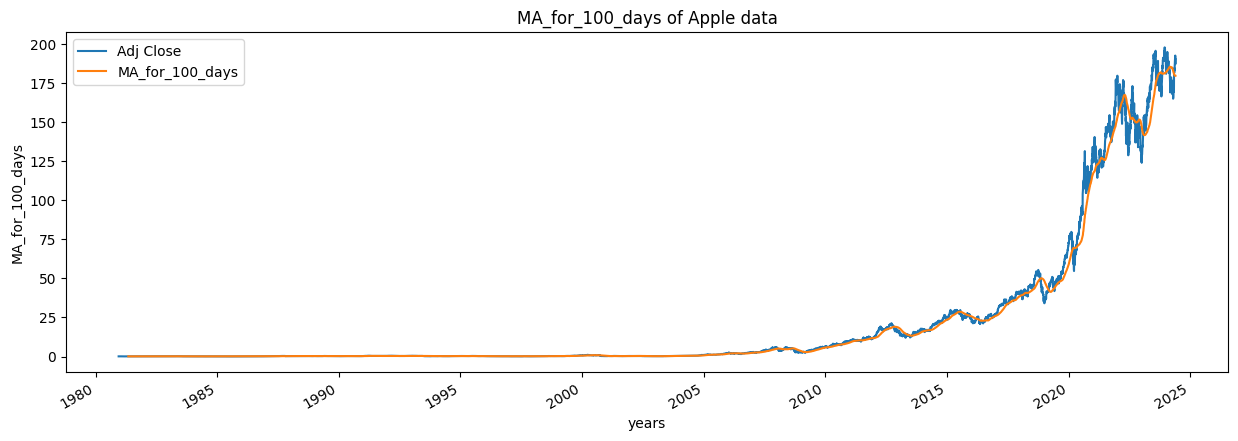

In [524]:
data['MA_for_100_days'] = data['Adj Close'].rolling(100).mean()
plot_graph((15,5), data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

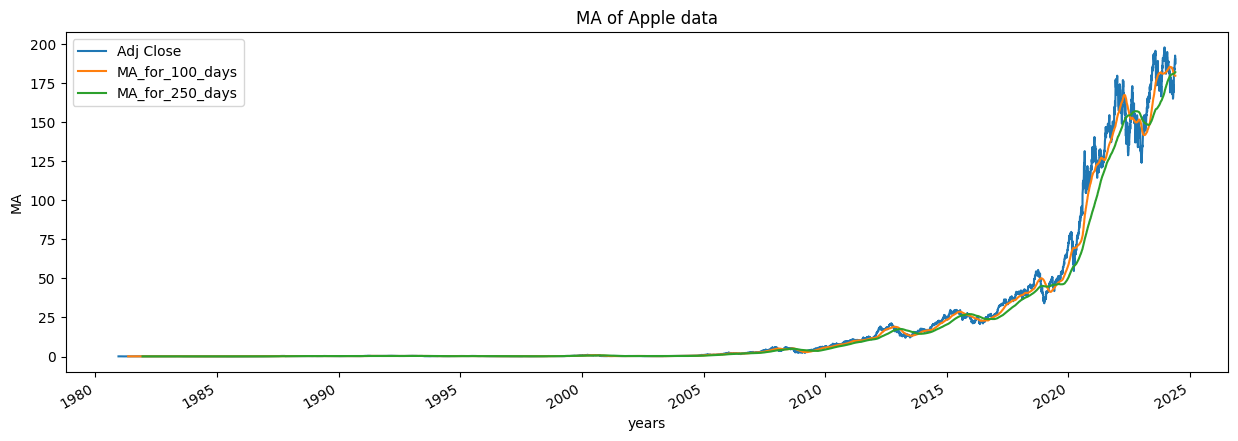

In [526]:
plot_graph((15,5), data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [528]:
data['percentage_change_cp'] = data['Adj Close'].pct_change()
data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
1980-12-12,0.099058,NaN
1980-12-15,0.093890,-0.052171
1980-12-16,0.086999,-0.073394
1980-12-17,0.089152,0.024747
1980-12-18,0.091737,0.028995


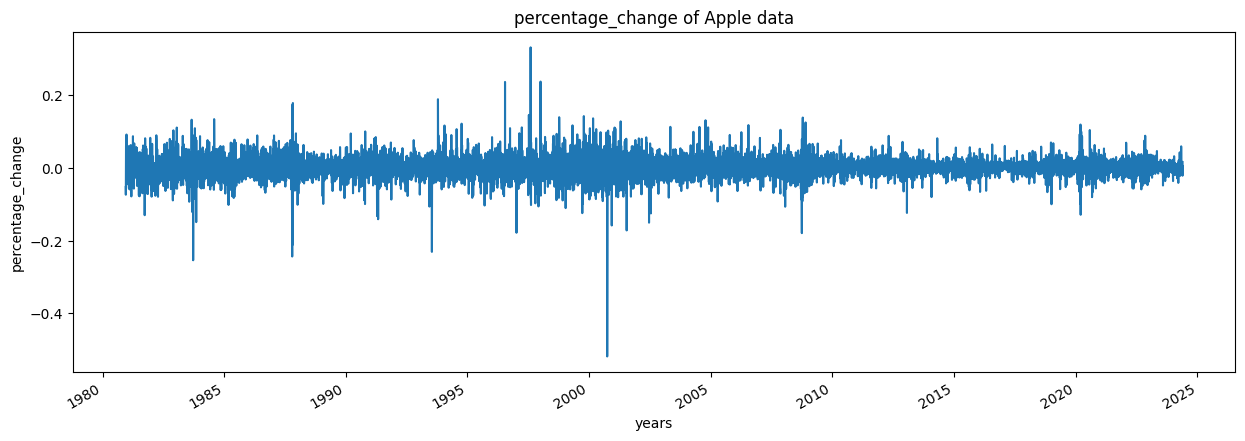

In [530]:
plot_graph((15,5), data['percentage_change_cp'], 'percentage_change')

In [532]:
Adj_close_price = data[['Adj Close']]

In [534]:
max(Adj_close_price.values),min(Adj_close_price.values)

(array([197.589523]), array([0.0379]))

In [536]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[3.09579841e-04],
       [2.83419590e-04],
       [2.48537568e-04],
       ...,
       [9.66137818e-01],
       [9.45788762e-01],
       [9.61480818e-01]])

In [538]:
len(scaled_data)

10954

In [540]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [542]:
x_data[0],y_data[0]

(array([[0.00030958],
        [0.00028342],
        [0.00024854],
        [0.00025944],
        [0.00027252],
        [0.00030086],
        [0.00032484],
        [0.00034664],
        [0.00037498],
        [0.00042731],
        [0.00043602],
        [0.00042077],
        [0.00040333],
        [0.00040987],
        [0.00039679],
        [0.00037062],
        [0.00034664],
        [0.00033574],
        [0.00036408],
        [0.00035972],
        [0.0003401 ],
        [0.00034228],
        [0.00035318],
        [0.00034882],
        [0.00038152],
        [0.00036408],
        [0.00037498],
        [0.00038152],
        [0.00037934],
        [0.00037062],
        [0.00036626],
        [0.00034882],
        [0.0003292 ],
        [0.00030086],
        [0.00027252],
        [0.00028996],
        [0.0003074 ],
        [0.0003074 ],
        [0.00030958],
        [0.00028342],
        [0.00028342],
        [0.00026816],
        [0.00026379],
        [0.0002529 ],
        [0.00026379],
        [0

In [544]:
int(len(x_data)*0.7)

7597

In [546]:
4908-100-int(len(x_data)*0.7)

-2789

In [548]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [550]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7597, 100, 1)
(7597, 1)
(3257, 100, 1)
(3257, 1)


In [552]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [554]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [555]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [558]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
7597/7597 [==============================] - 707s 92ms/step - loss: 6.5966e-06
Epoch 2/2
7597/7597 [==============================] - 723s 95ms/step - loss: 1.8996e-06


In [560]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100, 128)          66560     
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_2 (Dense)             (None, 25)                1625      
                                                                 
 dense_3 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117619 (459.45 KB)
Trainable params: 117619 (459.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [562]:
predictions = model.predict(x_test)

102/102 [==============================] - 11s 86ms/step


In [563]:
predictions

array([[0.04729182],
       [0.04710339],
       [0.04669643],
       ...,
       [0.5904404 ],
       [0.59036285],
       [0.58680993]], dtype=float32)

In [566]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[  9.380475],
       [  9.343251],
       [  9.262856],
       ...,
       [116.68036 ],
       [116.66504 ],
       [115.96316 ]], dtype=float32)

In [568]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[  9.818124],
       [  9.670166],
       [  9.521006],
       ...,
       [190.899994],
       [186.880005],
       [189.979996]])

In [570]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [572]:
rmse

28.870588048932145

In [574]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2011-06-16,9.818124,9.380475
2011-06-17,9.670166,9.343251
2011-06-20,9.521006,9.262856
2011-06-21,9.822351,9.150303
2011-06-22,9.741124,9.172223


<Figure size 640x480 with 0 Axes>

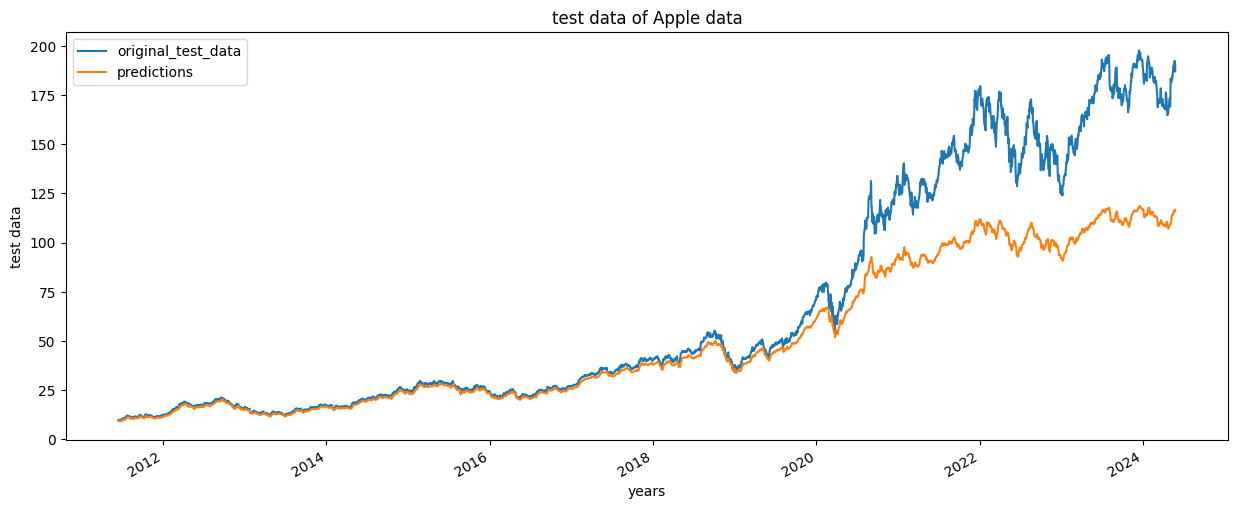

In [576]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

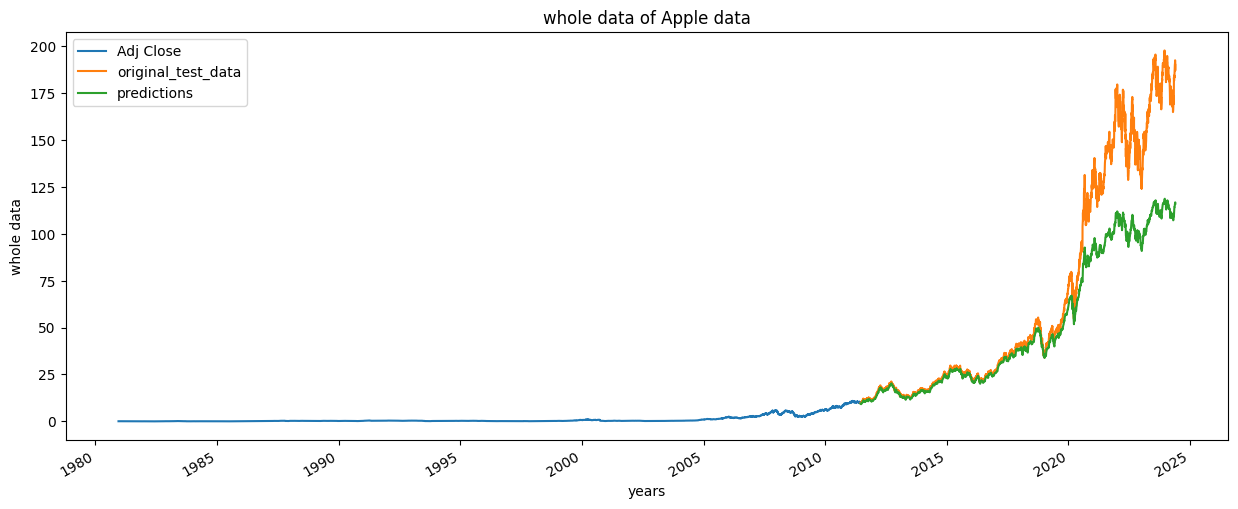

In [578]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [580]:
model.save("𝗰𝗼𝗱𝗲𝗮𝗹𝗽𝗵𝗮_𝘁𝗮𝘀𝗸𝘀_stock_price_model.keras")